<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Single_layer_LSTM_and_multilayer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePV0FJO/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePV0FJO/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePV0FJO/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [3]:
dataset

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

In [5]:
train_dataset = train_data.shuffle(BUFFER_SIZE)

In [6]:
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [7]:
import tensorflow as tf

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
        tf.keras.layers.Dense(dense_dim, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')                     
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 72s 642ms/step - loss: 0.5779 - accuracy: 0.6843 - val_loss: 0.5514 - val_accuracy: 0.7993
Epoch 2/10
98/98 [==============================] - 61s 612ms/step - loss: 0.3320 - accuracy: 0.8650 - val_loss: 0.3683 - val_accuracy: 0.8481
Epoch 3/10
98/98 [==============================] - 61s 610ms/step - loss: 0.2569 - accuracy: 0.9036 - val_loss: 0.3828 - val_accuracy: 0.8365
Epoch 4/10
98/98 [==============================] - 60s 606ms/step - loss: 0.2201 - accuracy: 0.9205 - val_loss: 0.4158 - val_accuracy: 0.8300
Epoch 5/10
98/98 [==============================] - 60s 607ms/step - loss: 0.1883 - accuracy: 0.9316 - val_loss: 0.4115 - val_accuracy: 0.8522
Epoch 6/10
98/98 [==============================] - 60s 603ms/step - loss: 0.1480 - accuracy: 0.9493 - val_loss: 0.5320 - val_accuracy: 0.8484
Epoch 7/10
98/98 [==============================] - 60s 603ms/step - loss: 0.1165 - accuracy: 0.9603 - val_loss: 0.4931 - val_accuracy: 0.8319

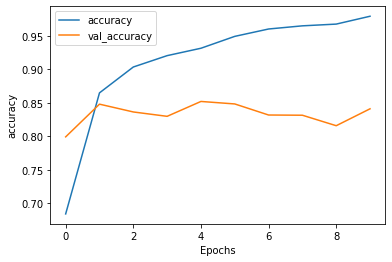

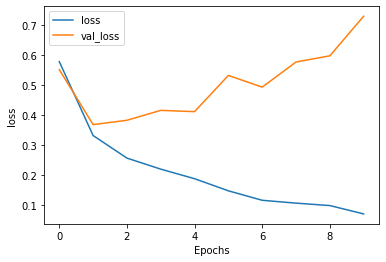

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
# Now develop model using multi-layer-lstm

lstm2_dim = 32

model1 = tf.keras.Sequential([
         tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences = True)),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
         tf.keras.layers.Dense(dense_dim, activation = 'relu'),
         tf.keras.layers.Dense(1, activation = 'sigmoid')                                                   
])

In [17]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [18]:
history1 = model1.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 121s 1s/step - loss: 0.6219 - accuracy: 0.6566 - val_loss: 0.6225 - val_accuracy: 0.6863
Epoch 2/10
98/98 [==============================] - 112s 1s/step - loss: 0.4317 - accuracy: 0.8150 - val_loss: 0.4571 - val_accuracy: 0.7917
Epoch 3/10
98/98 [==============================] - 114s 1s/step - loss: 0.3237 - accuracy: 0.8743 - val_loss: 0.4326 - val_accuracy: 0.8300
Epoch 4/10
98/98 [==============================] - 114s 1s/step - loss: 0.2580 - accuracy: 0.9054 - val_loss: 0.4168 - val_accuracy: 0.8292
Epoch 5/10
98/98 [==============================] - 113s 1s/step - loss: 0.1983 - accuracy: 0.9300 - val_loss: 0.4240 - val_accuracy: 0.8508
Epoch 6/10
98/98 [==============================] - 114s 1s/step - loss: 0.1484 - accuracy: 0.9508 - val_loss: 0.4943 - val_accuracy: 0.8331
Epoch 7/10
98/98 [==============================] - 113s 1s/step - loss: 0.1319 - accuracy: 0.9574 - val_loss: 0.5578 - val_accuracy: 0.7982
Epoch 8/10
98

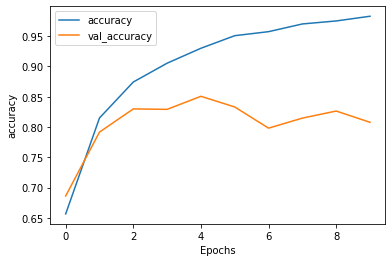

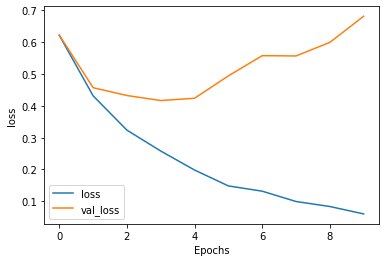

In [19]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")